In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
import os
import shutil
import tfci

2022-06-09 00:46:06.995814: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/nvidia/lib64:/usr/local/cuda/lib64
2022-06-09 00:46:06.995878: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
im_dir = 'DIV2K_valid_HR'
im_store_dir_jpeg = 'jpeg_ims'
os.mkdir(im_store_dir_jpeg)

im_name = '0{}.png'
num_ims = 5
start_ind = 801

im_jpg_name = 'store_jpg{}_{}.jpg'

qual_range = np.arange(0, 120, 20)

mse_jpg = np.zeros(qual_range.shape[0])
ssim_jpg = np.zeros(qual_range.shape[0])

num_bits = np.zeros(qual_range.shape[0])

for im_ind in range(start_ind,start_ind+num_ims):
    
    fp_read = os.path.join(im_dir, im_name.format(im_ind))
    im = cv2.imread(fp_read, cv2.IMREAD_COLOR)
    
    for q in range(len(qual_range)):
        qual = qual_range[q]
        fp_store = os.path.join(im_store_dir_jpeg, im_jpg_name.format(im_ind,qual))
        cv2.imwrite(fp_store, im, [int(cv2.IMWRITE_JPEG_QUALITY), qual])
        num_bits[q] += os.path.getsize(fp_store)
        im_jpg = cv2.imread(fp_store)
        mse_jpg[q] += mean_squared_error(im, im_jpg)
        ssim_jpg[q] += ssim(im, im_jpg, data_range=im.max() - im.min(), multichannel=True)
        
mse_jpg = mse_jpg/num_ims
ssim_jpg = ssim_jpg/num_ims
num_bits = num_bits/num_ims
shutil.rmtree(im_store_dir_jpeg)

FileExistsError: [Errno 17] File exists: 'jpeg_ims'

Text(0.5, 1.0, 'JPEG MSE vs Image Size')

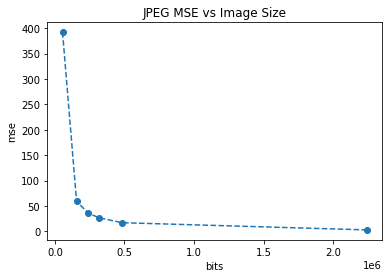

In [8]:
plt.plot(num_bits, mse_jpg, '--o')
plt.xlabel('bits')
plt.ylabel('mse')
plt.title('JPEG MSE vs Image Size')

Text(0.5, 1.0, 'JPEG SSIM vs Image Size')

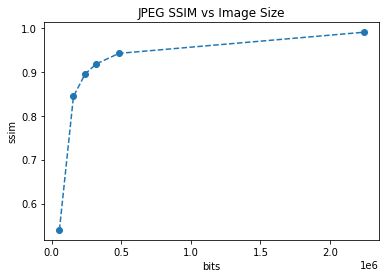

In [9]:
plt.plot(num_bits, ssim_jpg, '--o')
plt.xlabel('bits')
plt.ylabel('ssim')
plt.title('JPEG SSIM vs Image Size')

In [ ]:
im_dir = 'DIV2K_valid_HR'
im_store_dir_hific = "hific_ims"
im_store_decomp = "hific_ims_decomp"
im_name = '0{}.png'

im_hific_name = 'store_hific{}_{}.tfci'

start_ind = 801
num_ims = 1

model_name = "hific-{}"
models = ["hi", "mi", "lo"]

im_decomp_name = 'decomp_{}_{}.png'

for im_ind in range(start_ind,start_ind+num_ims):

    for model_ext in models:

        fp_read = os.path.join(im_dir, im_name.format(im_ind))
        im = cv2.imread(fp_read, cv2.IMREAD_COLOR)

        fp_out = os.path.join(im_store_dir_hific, im_hific_name.format(model_ext, start_ind))
        model = model_name.format(model_ext)
        fp_decomp = os.path.join(im_store_decomp, im_decomp_name.format(model_ext, start_ind))

        tfci.compress(model = model, input_file = fp_read, output_file = fp_out)
        tfci.decompress(input_file = fp_out, output_file = fp_decomp)

DIV2K_valid_HR/0801.png
hific_ims/store_hifichi_801.tfci
hific-hi
hific_ims_decomp/decomp_hi_801.png


2022-06-09 00:46:27.517728: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/nvidia/lib64:/usr/local/cuda/lib64
2022-06-09 00:46:27.517867: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/nvidia/lib64:/usr/local/cuda/lib64
2022-06-09 00:46:27.517962: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.9/site-packages/cv2/../../lib64:/us

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
DIV2K_valid_HR/0801.png
hific_ims/store_hificmi_801.tfci
hific-mi
hific_ims_decomp/decomp_mi_801.png
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [14]:
import tfci
tfci.compress(model = "hific-hi", input_file = "DIV2K_valid_HR/0801.png", output_file = "hific_ims/store_hific801.tfci")

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
im_hific = cv2.imread('0801.png.tfci.png')
mean_squared_error(im, im_hific)
ssim(im, im_hific, data_range=im.max() - im.min(), multichannel=True)
os.path.getsize("0801.png.tfci")

In [15]:
import tfci

2022-06-08 22:42:37.238930: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-08 22:42:37.244217: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/nvidia/lib64:/usr/local/cuda/lib64
2022-06-08 22:42:37.244228: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
shutil.rmtree(im_store_dir_hific)
shutil.rmtree(im_store_decomp)

In [ ]:
im_store_dir_hific = 'hific_ims'
im_store_decomp = 'hific_ims_decomp'

os.mkdir(im_store_dir_hific)
os.mkdir(im_store_decomp)

im_name = '0{}.png'
num_ims = 1
start_ind = 801

im_hific_name = 'store_hific{}_{}.tfci'

models = ['hific-lo', 'hific-mi', 'hific-hi']

mse_hific = np.zeros(len(models))
ssim_hific = np.zeros(len(models))

num_bits_hific = np.zeros(len(models))

for im_ind in range(start_ind,start_ind+num_ims):
    
    fp_read = os.path.join(im_dir, im_name.format(im_ind))
    
    for i in range(len(models)):
        model = models[i]
        fp_store = os.path.join(im_store_dir_hific, im_hific_name.format(im_ind,i))
        
        tfci.compress(model = model, input_file = fp_read, output_file = fp_store)
        num_bits_hific[i] += os.path.getsize(fp_store)
        
        fp_decomp = os.path.join(im_store_decomp, im_hific_name.format(im_ind,i))
        tfci.decompress(fp_store, fp_decomp)
        
        mse_hific[i] += mean_squared_error(im, im_jpg)
        mse_hific[i] += ssim(im, im_jpg, data_range=im.max() - im.min(), multichannel=True)
        
mse_hific = mse_hific/num_ims
ssim_hific = ssim_hific/num_ims
num_bits_hific = num_bits_hific/num_ims

shutil.rmtree(im_store_dir_hific)
shutil.rmtree(im_store_decomp)

2022-06-08 22:51:15.198846: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/nvidia/lib64:/usr/local/cuda/lib64
2022-06-08 22:51:15.198993: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/nvidia/lib64:/usr/local/cuda/lib64
2022-06-08 22:51:15.199066: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.9/site-packages/cv2/../../lib64:/us

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [77]:
tfci.compress

<function tfci.compress(model, input_file, output_file, rd_parameter=None, rd_parameter_tolerance=None, target_bpp=None, bpp_strict=False)>

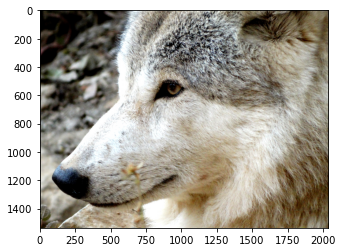

In [41]:
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [9]:
cv2.imwrite('jpeg_im/test.jpg', im, [int(cv2.IMWRITE_JPEG_QUALITY), 50])

True

In [20]:
im_jpeg = cv2.imread('test.jpg')

In [21]:
mean_squared_error(im, im_jpeg)

29.221807338963117

In [22]:
ssim(im, im_jpeg, data_range=im.max() - im.min(), multichannel=True)

0.9431881354222802

In [24]:
os.path.getsize("test.jpg")

320848

In [1]:
import tensorflow as tf
import tensorflow_compression as tfc

2022-06-05 13:32:34.377298: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-05 13:32:34.383102: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib64:/usr/local/cuda/lib64
2022-06-05 13:32:34.383119: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
!python tfci.py -h

2022-06-05 13:33:12.324587: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-05 13:33:12.330139: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib64:/usr/local/cuda/lib64
2022-06-05 13:33:12.330170: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
usage: tfci.py [-h] [--helpfull] [--url_prefix URL_PREFIX]
               [--metagraph_cache METAGRAPH_CACHE]
               {compress,decompress,models,tens

In [4]:
!python tfci.py models

2022-06-05 13:35:00.781987: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-05 13:35:00.787521: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib64:/usr/local/cuda/lib64
2022-06-05 13:35:00.787551: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
2022-06-05 13:35:06.402650: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libc

In [1]:
!python tfci.py compress hific-hi "DIV2K_valid_HR/0801.png" 

2022-06-08 20:26:36.713742: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-08 20:26:36.808821: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib64:/usr/local/cuda/lib64
2022-06-08 20:26:36.808908: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-08 20:26:45.856177: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/l

In [7]:
!python tfci.py decompress 0801.png.tfci

2022-06-05 13:37:49.634046: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-05 13:37:49.639231: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib64:/usr/local/cuda/lib64
2022-06-05 13:37:49.639262: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
2022-06-05 13:37:54.794538: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libc

In [3]:
im_hific = cv2.imread('0801.png.tfci.png')

In [4]:
mean_squared_error(im, im_hific)

NameError: name 'im' is not defined

In [18]:
ssim(im, im_hific, data_range=im.max() - im.min(), multichannel=True)

0.9407058218524367

In [25]:
os.path.getsize("0801.png.tfci")

189406